# 游戏玩家付费金额预测大赛 - 特征工程
总数据的10%

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_raw = '../data/raw/'
path_new = '../data/new/'
path_train = '../data/new/train=0.1/'
path_test = '../data/new/test/'

In [3]:
train_part1 = pd.read_csv(path_train + 'train=0.1-fe.csv')
train_part1.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.833333,0.0,0,0.0
1,2959017,121,129429,78242,0,0,6000,0,152480,48626,...,0,0,0,2,2,2,3.166667,0.0,0,0.0
2,242613,122,84839,52467,0,0,0,0,22144,29600,...,0,0,0,0,0,0,2.666667,0.0,0,0.0
3,1416097,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
4,680469,104,28625,7200,0,0,0,0,33625,3930,...,0,0,0,0,0,0,1.000000,0.0,0,0.0


In [4]:
test_df = pd.read_csv(path_test + 'tap_fun_test-fe.csv')
test_df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,94,166415.0,138362.0,0,0,0,0,258522,90142,...,0,0,0,0,1,1,1,8.000000,0.0,0
1,14934,94,10000.0,600.0,0,0,0,0,10000,400,...,0,0,0,0,0,0,0,0.166667,0.0,0
2,14935,94,10000.0,3700.0,0,0,0,0,10000,2000,...,0,0,0,0,0,0,0,17.000000,0.0,0
3,14936,94,210000.0,0.0,200000,0,200000,0,610000,0,...,0,0,0,0,0,0,0,1.666667,0.0,0
4,14937,94,11500.0,3700.0,0,0,0,0,11000,2000,...,0,0,0,0,0,0,0,0.333333,0.0,0


## 散点图 train_part1

Text(0.5,1,'Distribution of prediction_pay_price')

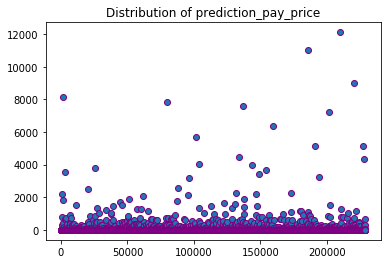

In [10]:
# 离群点检测：单个特征散点图
plt.scatter(range(train_part1.shape[0]), train_part1.prediction_pay_price.values, edgecolors='purple')
plt.title('Distribution of prediction_pay_price')

Text(0.5,1,'Distribution of wood_add_value')

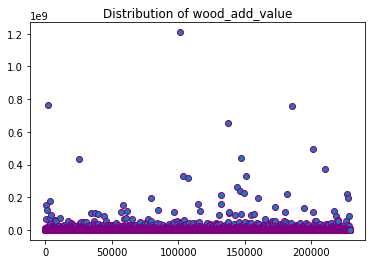

In [11]:
plt.scatter(range(train_part1.shape[0]), train_part1.wood_add_value.values, edgecolors='purple')
plt.title('Distribution of wood_add_value')

Text(0.5,1,'Distribution of wood_reduce_value')

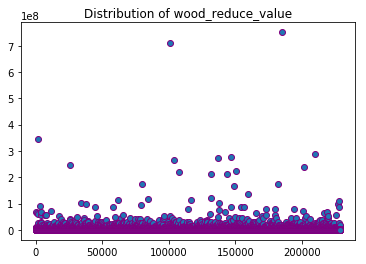

In [12]:
plt.scatter(range(train_part1.shape[0]), train_part1.wood_reduce_value.values, edgecolors='purple')
plt.title('Distribution of wood_reduce_value')

## train_pay1 

Text(0.5,1,'Distribution of prediction_pay_price')

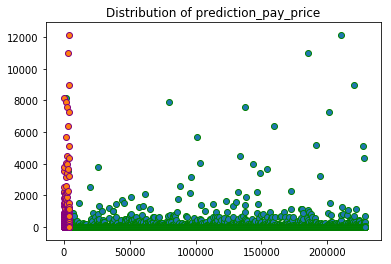

In [18]:
# 离群点检测：单个特征散点图
plt.scatter(range(train_part1.shape[0]), train_part1.prediction_pay_price.values, edgecolors='green')
plt.title('Distribution of prediction_pay_price')
plt.scatter(range(train_pay1.shape[0]), train_pay1.prediction_pay_price.values, edgecolors='purple')
plt.title('Distribution of prediction_pay_price')

Text(0.5,1,'Distribution of wood_add_value')

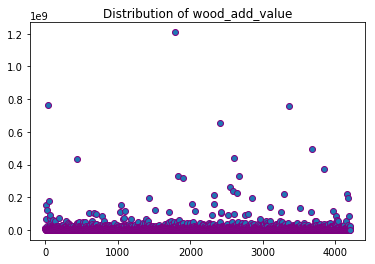

In [15]:
plt.scatter(range(train_pay1.shape[0]), train_pay1.wood_add_value.values, edgecolors='purple')
plt.title('Distribution of wood_add_value')

Text(0.5,1,'Distribution of wood_reduce_value')

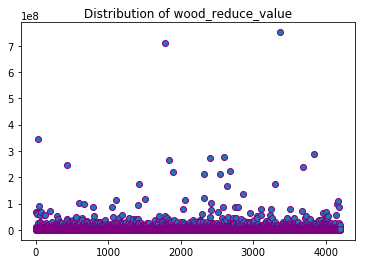

In [16]:
plt.scatter(range(train_pay1.shape[0]), train_pay1.wood_reduce_value.values, edgecolors='purple')
plt.title('Distribution of wood_reduce_value')

## 特征之间的相关性
其值范围为 -1 到 +1，0表示两个变量不相关，正值表示正相关，负值表示负相关，值越大表示相关性越强。

In [26]:
# 不计算 id
train = train_part1.drop(['user_id', 'sr_rss_help_bonus_level'], axis=1)
corr_pearson = train.corr(method='pearson') 
# 根据 prediction_pay_price 相关性排序，升序
sort_corr_pearson = corr_pearson.sort_values('prediction_pay_price')
# train=0.1-fe.csv 取相关性 > 0.3的特征47个
sort_corr_pearson.to_csv(path_new + 'train=0.1-sort_corr_pearson.csv')
sort_corr_pearson.head()

,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
register_time,1.000000,-0.015468,-0.017886,-0.003306,-0.002515,-0.002601,0.000737,-0.018287,-0.017993,-0.005436,...,-0.021651,-0.017432,-0.013266,-0.052453,-0.052417,-0.049829,0.000705,0.002335,0.005901,0.001568
sr_scout_level,0.000056,0.189367,0.236684,0.101103,0.115647,0.098680,0.063674,0.183111,0.235687,0.142357,...,0.338842,0.280422,0.300109,0.470115,0.469583,0.460462,0.444456,0.071852,0.223884,0.073557
sr_outpost_tier_2_level,-0.057116,0.232405,0.291011,0.122906,0.138326,0.117131,0.068516,0.234958,0.295558,0.163646,...,0.382797,0.330830,0.347601,0.608595,0.607836,0.595544,0.552843,0.078585,0.252271,0.079228
bd_magic_coin_tree_level,-0.046698,0.230966,0.283127,0.121308,0.134433,0.112989,0.075395,0.228544,0.284352,0.164629,...,0.308300,0.257934,0.276990,0.512746,0.512272,0.501715,0.494317,0.082360,0.222832,0.080164
bd_market_level,-0.025641,0.241943,0.303822,0.128008,0.145494,0.119072,0.075927,0.240209,0.307429,0.179059,...,0.332269,0.284699,0.308606,0.547711,0.547231,0.537790,0.538260,0.088668,0.270815,0.089973


In [28]:
# 不计算 id
train = train_pay1.drop(['user_id', 'sr_rss_help_bonus_level'], axis=1)
corr_pearson_pay = train.corr(method='pearson') 
# 根据 prediction_pay_price 相关性排序，升序
sort_corr_pearson_pay = corr_pearson_pay.sort_values('prediction_pay_price')
# train=0.1-fe.csv 取相关性 > 0.3的特征47个
sort_corr_pearson_pay.to_csv(path_new + 'train=0.1-sort_corr_pearson_pay.csv')
sort_corr_pearson_pay.head()

,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
register_time,1.000000,-0.035449,-0.045261,-0.015800,-0.014500,-0.018560,-0.001203,-0.044009,-0.044623,-0.051045,...,-0.051706,-0.034354,-0.034835,-0.161107,-0.160108,-0.154101,0.027499,0.007706,0.014751,0.006519
sr_outpost_tier_2_level,-0.319900,0.131585,0.168132,0.089206,0.103550,0.091093,0.058770,0.146231,0.173553,0.138566,...,0.217699,0.195942,0.199912,0.461098,0.460010,0.447116,0.292254,0.044499,0.131348,0.055233
sr_infantry_tier_2_level,-0.201727,0.151629,0.204571,0.104695,0.132389,0.100716,0.062615,0.167186,0.212460,0.170133,...,0.270709,0.270029,0.279672,0.548190,0.547822,0.534154,0.418420,0.059869,0.197409,0.065213
sr_cavalry_tier_2_level,-0.196090,0.152040,0.205140,0.105675,0.134042,0.102063,0.064247,0.166944,0.212305,0.170790,...,0.272330,0.272854,0.281501,0.541996,0.541588,0.528087,0.421366,0.062183,0.206870,0.067926
sr_troop_consumption_level,-0.097576,0.116702,0.147084,0.085991,0.101188,0.084828,0.063210,0.120083,0.134901,0.107965,...,0.139701,0.161219,0.166803,0.319385,0.320111,0.316233,0.280631,0.083198,0.229516,0.075646


## 计算每天的平均值
### 训练集：输入特征/7 

In [41]:
train_part1.head(24)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.833333,0.00,0,0.00
1,2959017,121,129429,78242,0,0,6000,0,152480,48626,...,0,0,0,2,2,2,3.166667,0.00,0,0.00
2,242613,122,84839,52467,0,0,0,0,22144,29600,...,0,0,0,0,0,0,2.666667,0.00,0,0.00
3,1416097,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.00,0,0.00
4,680469,104,28625,7200,0,0,0,0,33625,3930,...,0,0,0,0,0,0,1.000000,0.00,0,0.00
5,2956812,122,10000,600,0,0,0,0,10000,400,...,0,0,0,0,0,0,0.166667,0.00,0,0.00
6,1926655,128,20125,3700,0,0,0,0,16375,2000,...,0,0,0,0,0,0,0.333333,0.00,0,0.00
7,1594489,129,10000,0,0,0,0,0,10000,0,...,0,0,0,0,0,0,0.000000,0.00,0,0.00
8,1940841,117,193548,99405,0,0,0,0,150324,70403,...,6,1,1,1,1,1,11.333333,0.00,0,0.00
9,2775415,135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.500000,0.00,0,0.00


In [6]:
avg_day_train_part1 = train_part1.copy()
# 去掉注册天数
avg_day_train_part1.drop('register_time', inplace=True, axis=1)
# 输入特征/7、
avg_day_train_part1 = avg_day_train_part1 / 7
# # 目标值/45
# avg_day_train_part1.prediction_pay_price = train_part1.prediction_pay_price / 45
avg_day_train_part1.prediction_pay_price = train_part1.prediction_pay_price
avg_day_train_part1 = avg_day_train_part1.astype(np.float32)

# 还原 user_id
avg_day_train_part1.user_id = train_part1.user_id
avg_day_train_part1.user_id = avg_day_train_part1.user_id.astype(np.int32)
avg_day_train_part1.head(24)

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547619,0.000000,0.000000,0.00
1,2959017,18489.857422,11177.428711,0.000000,0.00000,857.142883,0.0,2.178286e+04,6946.571289,0.000000,...,0.000000,0.000000,0.000000,0.285714,0.285714,0.285714,0.452381,0.000000,0.000000,0.00
2,242613,12119.857422,7495.285645,0.000000,0.00000,0.000000,0.0,3.163428e+03,4228.571289,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380952,0.000000,0.000000,0.00
3,1416097,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.00
4,680469,4089.285645,1028.571411,0.000000,0.00000,0.000000,0.0,4.803571e+03,561.428589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.00
5,2956812,1428.571411,85.714287,0.000000,0.00000,0.000000,0.0,1.428571e+03,57.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.00
6,1926655,2875.000000,528.571411,0.000000,0.00000,0.000000,0.0,2.339286e+03,285.714294,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.00
7,1594489,1428.571411,0.000000,0.000000,0.00000,0.000000,0.0,1.428571e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,1940841,27649.714844,14200.713867,0.000000,0.00000,0.000000,0.0,2.147486e+04,10057.571289,0.000000,...,0.857143,0.142857,0.142857,0.142857,0.142857,0.142857,1.619048,0.000000,0.000000,0.00
9,2775415,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.00


In [70]:
# train=0.1-fe-avg_day.csv 计算每天的平均值
avg_day_train_part1.to_csv(path_train + 'train=0.1-fe-avg_day.csv', index=False)
avg_day_train_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Columns: 108 entries, user_id to prediction_pay_price
dtypes: float32(107), int32(1)
memory usage: 94.3 MB


### 测试集：输入特征/7 

In [46]:
test_df.head(21)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,94,166415.0,138362.0,0,0,0,0,258522,90142,...,0,0,0,0,1,1,1,8.000000,0.00,0
1,14934,94,10000.0,600.0,0,0,0,0,10000,400,...,0,0,0,0,0,0,0,0.166667,0.00,0
2,14935,94,10000.0,3700.0,0,0,0,0,10000,2000,...,0,0,0,0,0,0,0,17.000000,0.00,0
3,14936,94,210000.0,0.0,200000,0,200000,0,610000,0,...,0,0,0,0,0,0,0,1.666667,0.00,0
4,14937,94,11500.0,3700.0,0,0,0,0,11000,2000,...,0,0,0,0,0,0,0,0.333333,0.00,0
5,14938,94,10000.0,0.0,0,0,0,0,10000,0,...,0,0,0,0,0,0,0,0.000000,0.00,0
6,14939,94,46088.0,20820.0,0,0,0,0,42650,11630,...,0,0,0,0,0,0,0,21.833333,0.00,0
7,14940,94,10000.0,600.0,0,0,0,0,10000,400,...,0,0,0,0,0,0,0,0.166667,0.00,0
8,14941,94,308065.0,205590.0,0,0,0,0,289387,109013,...,0,6,3,0,2,2,2,8.000000,0.00,0
9,14942,94,27688.0,5750.0,0,0,0,0,32625,3000,...,0,0,0,0,0,0,0,0.500000,0.00,0


In [7]:
avg_day_test = test_df.copy()
# 去掉注册天数
avg_day_test.drop('register_time', inplace=True, axis=1)
avg_day_test = avg_day_test / 7
avg_day_test = avg_day_test.astype(np.float32)

# 这两个特征还原
avg_day_test.user_id = test_df.user_id.astype(np.int32)
avg_day_test.head(21)

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,23773.572266,19766.000000,0.000000,0.0,0.000000,0.0,36931.714844,12877.428711,0.000000,...,0.0,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,1.142857,0.000000,0.000000
1,14934,1428.571411,85.714287,0.000000,0.0,0.000000,0.0,1428.571411,57.142857,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000
2,14935,1428.571411,528.571411,0.000000,0.0,0.000000,0.0,1428.571411,285.714294,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.428571,0.000000,0.000000
3,14936,30000.000000,0.000000,28571.427734,0.0,28571.427734,0.0,87142.859375,0.000000,8571.428711,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.000000,0.000000
4,14937,1642.857178,528.571411,0.000000,0.0,0.000000,0.0,1571.428589,285.714294,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
5,14938,1428.571411,0.000000,0.000000,0.0,0.000000,0.0,1428.571411,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,14939,6584.000000,2974.285645,0.000000,0.0,0.000000,0.0,6092.856934,1661.428589,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.119048,0.000000,0.000000
7,14940,1428.571411,85.714287,0.000000,0.0,0.000000,0.0,1428.571411,57.142857,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000
8,14941,44009.285156,29370.000000,0.000000,0.0,0.000000,0.0,41341.000000,15573.286133,9294.857422,...,0.0,0.857143,0.428571,0.000000,0.285714,0.285714,0.285714,1.142857,0.000000,0.000000
9,14942,3955.428467,821.428589,0.000000,0.0,0.000000,0.0,4660.714355,428.571442,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000


In [67]:
# tap_fun_test-fe-avg_day.csv 计算每天的平均值
avg_day_test.to_csv(path_test + 'tap_fun_test-fe-avg_day.csv', index=False)
avg_day_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 107 entries, user_id to pay_count
dtypes: float32(106), int32(1)
memory usage: 338.3 MB


### 训练集：动态特征/7 

In [5]:
dynamic_col = ['wood_add_value', 'wood_reduce_value', 
               'stone_add_value', 'stone_reduce_value', 
               'ivory_add_value', 'ivory_reduce_value', 
               'meat_add_value', 'meat_reduce_value', 
               'magic_add_value', 'magic_reduce_value', 
               'infantry_add_value', 'infantry_reduce_value', 
               'cavalry_add_value', 'cavalry_reduce_value', 
               'shaman_add_value', 'shaman_reduce_value', 
               'wound_infantry_add_value', 'wound_infantry_reduce_value', 
               'wound_cavalry_add_value', 'wound_cavalry_reduce_value', 
               'wound_shaman_add_value', 'wound_shaman_reduce_value', 
               'general_acceleration_add_value', 'general_acceleration_reduce_value', 
               'building_acceleration_add_value', 'building_acceleration_reduce_value', 
               'reaserch_acceleration_add_value', 'reaserch_acceleration_reduce_value', 
               'training_acceleration_add_value', 'training_acceleration_reduce_value', 
               'treatment_acceleraion_add_value', 'treatment_acceleration_reduce_value', 
               'pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count', 
               'pve_battle_count', 'pve_lanch_count', 'pve_win_count', 
               'avg_online_minutes', 'pay_price', 'pay_count']

In [72]:
train_part1.head(24)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.833333,0.00,0,0.00
1,2959017,121,129429,78242,0,0,6000,0,152480,48626,...,0,0,0,2,2,2,3.166667,0.00,0,0.00
2,242613,122,84839,52467,0,0,0,0,22144,29600,...,0,0,0,0,0,0,2.666667,0.00,0,0.00
3,1416097,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.00,0,0.00
4,680469,104,28625,7200,0,0,0,0,33625,3930,...,0,0,0,0,0,0,1.000000,0.00,0,0.00
5,2956812,122,10000,600,0,0,0,0,10000,400,...,0,0,0,0,0,0,0.166667,0.00,0,0.00
6,1926655,128,20125,3700,0,0,0,0,16375,2000,...,0,0,0,0,0,0,0.333333,0.00,0,0.00
7,1594489,129,10000,0,0,0,0,0,10000,0,...,0,0,0,0,0,0,0.000000,0.00,0,0.00
8,1940841,117,193548,99405,0,0,0,0,150324,70403,...,6,1,1,1,1,1,11.333333,0.00,0,0.00
9,2775415,135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.500000,0.00,0,0.00


In [9]:
avg_day_train_part1 = train_part1.copy()
# 去掉注册天数
avg_day_train_part1.drop('register_time', inplace=True, axis=1)
# 动态特征/7、
avg_day_train_part1[dynamic_col] = avg_day_train_part1[dynamic_col] / 7
avg_day_train_part1 = avg_day_train_part1.astype(np.float32)

# 还原 user_id
avg_day_train_part1.user_id = train_part1.user_id
avg_day_train_part1.user_id = avg_day_train_part1.user_id.astype(np.int32)
avg_day_train_part1.head(24)

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547619,0.000000,0.000000,0.00
1,2959017,18489.857422,11177.428711,0.000000,0.00000,857.142883,0.0,2.178286e+04,6946.571289,0.000000,...,0.000000,0.000000,0.000000,0.285714,0.285714,0.285714,0.452381,0.000000,0.000000,0.00
2,242613,12119.857422,7495.285645,0.000000,0.00000,0.000000,0.0,3.163428e+03,4228.571289,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380952,0.000000,0.000000,0.00
3,1416097,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.00
4,680469,4089.285645,1028.571411,0.000000,0.00000,0.000000,0.0,4.803571e+03,561.428589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.00
5,2956812,1428.571411,85.714287,0.000000,0.00000,0.000000,0.0,1.428571e+03,57.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.00
6,1926655,2875.000000,528.571411,0.000000,0.00000,0.000000,0.0,2.339286e+03,285.714294,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.00
7,1594489,1428.571411,0.000000,0.000000,0.00000,0.000000,0.0,1.428571e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,1940841,27649.714844,14200.713867,0.000000,0.00000,0.000000,0.0,2.147486e+04,10057.571289,0.000000,...,0.857143,0.142857,0.142857,0.142857,0.142857,0.142857,1.619048,0.000000,0.000000,0.00
9,2775415,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.00


In [74]:
# train=0.1-fe-avg_day_dynamic-all.csv 计算每天的平均值
avg_day_train_part1.to_csv(path_train + 'train=0.1-fe-avg_day_dynamic-all.csv', index=False)
avg_day_train_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Columns: 108 entries, user_id to prediction_pay_price
dtypes: float32(107), int32(1)
memory usage: 94.3 MB


In [78]:
avg_day_train_part1_dynamic = avg_day_train_part1[['user_id']+dynamic_col+['prediction_pay_price']]
avg_day_train_part1_dynamic.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.547619,0.0,0.0,0.0
1,2959017,18489.857422,11177.428711,0.0,0.0,857.142883,0.0,21782.857422,6946.571289,0.0,...,0.0,0.0,0.0,0.285714,0.285714,0.285714,0.452381,0.0,0.0,0.0
2,242613,12119.857422,7495.285645,0.0,0.0,0.000000,0.0,3163.428467,4228.571289,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.380952,0.0,0.0,0.0
3,1416097,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.047619,0.0,0.0,0.0
4,680469,4089.285645,1028.571411,0.0,0.0,0.000000,0.0,4803.571289,561.428589,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.0


In [79]:
# train=0.1-fe-avg_day_dynamic-dynamic.csv 计算每天的平均值
avg_day_train_part1_dynamic.to_csv(path_train + 'train=0.1-fe-avg_day_dynamic-dynamic.csv', index=False)
avg_day_train_part1_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Data columns (total 43 columns):
user_id                                228800 non-null int32
wood_add_value                         228800 non-null float32
wood_reduce_value                      228800 non-null float32
stone_add_value                        228800 non-null float32
stone_reduce_value                     228800 non-null float32
ivory_add_value                        228800 non-null float32
ivory_reduce_value                     228800 non-null float32
meat_add_value                         228800 non-null float32
meat_reduce_value                      228800 non-null float32
magic_add_value                        228800 non-null float32
magic_reduce_value                     228800 non-null float32
infantry_add_value                     228800 non-null float32
infantry_reduce_value                  228800 non-null float32
cavalry_add_value                      228800 non-null float32
cavalry_r

In [10]:
# 计算静态特征列表
all_col = list(avg_day_train_part1.columns)
static_col = [i for i in all_col if i not in dynamic_col]
static_col

['user_id',
 'bd_training_hut_level',
 'bd_healing_lodge_level',
 'bd_stronghold_level',
 'bd_outpost_portal_level',
 'bd_barrack_level',
 'bd_healing_spring_level',
 'bd_dolmen_level',
 'bd_guest_cavern_level',
 'bd_warehouse_level',
 'bd_watchtower_level',
 'bd_magic_coin_tree_level',
 'bd_hall_of_war_level',
 'bd_market_level',
 'bd_hero_gacha_level',
 'bd_hero_strengthen_level',
 'bd_hero_pve_level',
 'sr_scout_level',
 'sr_training_speed_level',
 'sr_infantry_tier_2_level',
 'sr_cavalry_tier_2_level',
 'sr_shaman_tier_2_level',
 'sr_infantry_atk_level',
 'sr_cavalry_atk_level',
 'sr_shaman_atk_level',
 'sr_infantry_tier_3_level',
 'sr_cavalry_tier_3_level',
 'sr_shaman_tier_3_level',
 'sr_troop_defense_level',
 'sr_infantry_def_level',
 'sr_cavalry_def_level',
 'sr_shaman_def_level',
 'sr_infantry_hp_level',
 'sr_cavalry_hp_level',
 'sr_shaman_hp_level',
 'sr_infantry_tier_4_level',
 'sr_cavalry_tier_4_level',
 'sr_shaman_tier_4_level',
 'sr_troop_attack_level',
 'sr_construction_

In [11]:
avg_day_train_part1_static = avg_day_train_part1[static_col]
avg_day_train_part1_static.head()

,user_id,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,...,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,prediction_pay_price
0,2320186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2959017,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,242613,3.0,0.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1416097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,680469,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# train=0.1-fe-avg_day_dynamic-static.csv 计算每天的平均值
avg_day_train_part1_static.to_csv(path_train + 'train=0.1-fe-avg_day_dynamic-static.csv', index=False)
avg_day_train_part1_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Data columns (total 67 columns):
user_id                           228800 non-null int32
bd_training_hut_level             228800 non-null float32
bd_healing_lodge_level            228800 non-null float32
bd_stronghold_level               228800 non-null float32
bd_outpost_portal_level           228800 non-null float32
bd_barrack_level                  228800 non-null float32
bd_healing_spring_level           228800 non-null float32
bd_dolmen_level                   228800 non-null float32
bd_guest_cavern_level             228800 non-null float32
bd_warehouse_level                228800 non-null float32
bd_watchtower_level               228800 non-null float32
bd_magic_coin_tree_level          228800 non-null float32
bd_hall_of_war_level              228800 non-null float32
bd_market_level                   228800 non-null float32
bd_hero_gacha_level               228800 non-null float32
bd_hero_strengthen_le

### 测试集：动态特征/7 

In [12]:
avg_day_test = test_df.copy()
# 去掉注册天数
avg_day_test.drop('register_time', inplace=True, axis=1)
avg_day_test[dynamic_col] = avg_day_test[dynamic_col] / 7
avg_day_test = avg_day_test.astype(np.float32)

# 这两个特征还原
avg_day_test.user_id = test_df.user_id.astype(np.int32)
avg_day_test.head(21)

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,23773.572266,19766.000000,0.000000,0.0,0.000000,0.0,36931.714844,12877.428711,0.000000,...,0.0,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,1.142857,0.000000,0.000000
1,14934,1428.571411,85.714287,0.000000,0.0,0.000000,0.0,1428.571411,57.142857,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000
2,14935,1428.571411,528.571411,0.000000,0.0,0.000000,0.0,1428.571411,285.714294,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.428571,0.000000,0.000000
3,14936,30000.000000,0.000000,28571.427734,0.0,28571.427734,0.0,87142.859375,0.000000,8571.428711,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.000000,0.000000
4,14937,1642.857178,528.571411,0.000000,0.0,0.000000,0.0,1571.428589,285.714294,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
5,14938,1428.571411,0.000000,0.000000,0.0,0.000000,0.0,1428.571411,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,14939,6584.000000,2974.285645,0.000000,0.0,0.000000,0.0,6092.856934,1661.428589,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.119048,0.000000,0.000000
7,14940,1428.571411,85.714287,0.000000,0.0,0.000000,0.0,1428.571411,57.142857,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000
8,14941,44009.285156,29370.000000,0.000000,0.0,0.000000,0.0,41341.000000,15573.286133,9294.857422,...,0.0,0.857143,0.428571,0.000000,0.285714,0.285714,0.285714,1.142857,0.000000,0.000000
9,14942,3955.428467,821.428589,0.000000,0.0,0.000000,0.0,4660.714355,428.571442,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000


In [76]:
# tap_fun_test-fe-avg_day_dynamic-all.csv 计算每天的平均值
avg_day_test.to_csv(path_test + 'tap_fun_test-fe-avg_day_dynamic-all.csv', index=False)
avg_day_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 107 entries, user_id to pay_count
dtypes: float32(106), int32(1)
memory usage: 338.3 MB


In [13]:
avg_day_test_dynamic = avg_day_test[['user_id']+dynamic_col]
avg_day_test_dynamic.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,treatment_acceleration_reduce_value,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,23773.572266,19766.000000,0.000000,0.0,0.000000,0.0,36931.714844,12877.428711,0.000000,...,0.0,0.0,0.0,0.0,0.142857,0.142857,0.142857,1.142857,0.0,0.0
1,14934,1428.571411,85.714287,0.000000,0.0,0.000000,0.0,1428.571411,57.142857,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.023810,0.0,0.0
2,14935,1428.571411,528.571411,0.000000,0.0,0.000000,0.0,1428.571411,285.714294,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.428571,0.0,0.0
3,14936,30000.000000,0.000000,28571.427734,0.0,28571.427734,0.0,87142.859375,0.000000,8571.428711,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.238095,0.0,0.0
4,14937,1642.857178,528.571411,0.000000,0.0,0.000000,0.0,1571.428589,285.714294,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.047619,0.0,0.0


In [88]:
# tap_fun_test-fe-avg_day_dynamic-dynamic.csv 计算每天的平均值
avg_day_test_dynamic.to_csv(path_test + 'tap_fun_test-fe-avg_day_dynamic-dynamic.csv', index=False)
avg_day_test_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Data columns (total 42 columns):
user_id                                828934 non-null int32
wood_add_value                         828934 non-null float32
wood_reduce_value                      828934 non-null float32
stone_add_value                        828934 non-null float32
stone_reduce_value                     828934 non-null float32
ivory_add_value                        828934 non-null float32
ivory_reduce_value                     828934 non-null float32
meat_add_value                         828934 non-null float32
meat_reduce_value                      828934 non-null float32
magic_add_value                        828934 non-null float32
magic_reduce_value                     828934 non-null float32
infantry_add_value                     828934 non-null float32
infantry_reduce_value                  828934 non-null float32
cavalry_add_value                      828934 non-null float32
cavalry_r

In [14]:
# 去除 prediction_pay_price
static_col_test = [i for i in static_col if not i == 'prediction_pay_price']
avg_day_test_static = avg_day_test[static_col_test]
avg_day_test_static.head()

,user_id,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,...,sr_gathering_hunter_buff_level,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level
0,14933,1.0,4.0,4.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14934,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14935,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14937,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# tap_fun_test-fe-avg_day_dynamic-static.csv 计算每天的平均值
avg_day_test_static.to_csv(path_test + 'tap_fun_test-fe-avg_day_dynamic-static.csv', index=False)
avg_day_test_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Data columns (total 66 columns):
user_id                           828934 non-null int32
bd_training_hut_level             828934 non-null float32
bd_healing_lodge_level            828934 non-null float32
bd_stronghold_level               828934 non-null float32
bd_outpost_portal_level           828934 non-null float32
bd_barrack_level                  828934 non-null float32
bd_healing_spring_level           828934 non-null float32
bd_dolmen_level                   828934 non-null float32
bd_guest_cavern_level             828934 non-null float32
bd_warehouse_level                828934 non-null float32
bd_watchtower_level               828934 non-null float32
bd_magic_coin_tree_level          828934 non-null float32
bd_hall_of_war_level              828934 non-null float32
bd_market_level                   828934 non-null float32
bd_hero_gacha_level               828934 non-null float32
bd_hero_strengthen_le

## 计算在线时长平均值：除了付费之外的输入特征/在线时长，去掉在线时长
###  训练集:  输入特征/ 在线时长

In [58]:
train_part1.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.833333,0.0,0,0.0
1,2959017,121,129429,78242,0,0,6000,0,152480,48626,...,0,0,0,2,2,2,3.166667,0.0,0,0.0
2,242613,122,84839,52467,0,0,0,0,22144,29600,...,0,0,0,0,0,0,2.666667,0.0,0,0.0
3,1416097,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
4,680469,104,28625,7200,0,0,0,0,33625,3930,...,0,0,0,0,0,0,1.000000,0.0,0,0.0


In [6]:
# 不需要被在线时间平均的特征
non_online_col = ['user_id', 'register_time', 'avg_online_minutes', 
                  'pay_price', 'pay_count', 'prediction_pay_price']

In [12]:
avg_online_train_part1 = train_part1[non_online_col]
avg_online_train_part1.head()

,user_id,register_time,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,2320186,124,3.833333,0.0,0,0.0
1,2959017,121,3.166667,0.0,0,0.0
2,242613,122,2.666667,0.0,0,0.0
3,1416097,136,0.333333,0.0,0,0.0
4,680469,104,1.000000,0.0,0,0.0


In [17]:
# def avg_online_minutes_filter(x):
#     if x < 1:
#         x = 1
#     return x
# # avg_online_train_part1.avg_online_minutes = avg_online_train_part1.avg_online_minutes.apply(avg_online_minutes_filter)
# # avg_online_train_part1.head()

In [18]:
avg_online_train_part1 = train_part1.copy()
# avg_online_train_part1.avg_online_minutes = avg_online_train_part1.avg_online_minutes * 10
# avg_online_train_part1.avg_online_minutes = avg_online_train_part1.avg_online_minutes.astype(np.int32)
avg_online_train_part1.avg_online_minutes = avg_online_train_part1.avg_online_minutes.apply(avg_online_minutes_filter)

all_col = list(avg_online_train_part1.columns)
# 需要被在线时间平均的特征
avg_online_col = [i for i in all_col if i not in non_online_col]
for col in avg_online_col:
    avg_online_train_part1[col] = avg_online_train_part1[col] / avg_online_train_part1.avg_online_minutes
#     avg_online_train_part1[col] = avg_online_train_part1[col] / 7
    avg_online_train_part1[col] = avg_online_train_part1[col] * 10000
    avg_online_train_part1[col] = avg_online_train_part1[col].astype(np.int32)
    avg_online_train_part1[col] = avg_online_train_part1[col] / 10000

# 去掉注册天数
avg_online_train_part1.drop(['register_time', 'avg_online_minutes'], inplace=True, axis=1)
avg_online_train_part1 = avg_online_train_part1.astype(np.float32)
avg_online_train_part1.user_id = avg_online_train_part1.user_id.astype(np.int32)
avg_online_train_part1.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,pay_price,pay_count,prediction_pay_price
0,2320186,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0
1,2959017,40872.312500,24707.998047,0.0,0.0,1894.736572,0.0,48151.574219,15355.577148,0.0,...,0.0,0.0,0.0,0.0,0.6315,0.6315,0.6315,0.0,0.0,0.0
2,242613,31814.621094,19675.123047,0.0,0.0,0.000000,0.0,8303.999023,11099.999023,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0
3,1416097,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0
4,680469,28625.000000,7200.000000,0.0,0.0,0.000000,0.0,33625.000000,3930.000000,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0


In [19]:
# train=0.1-fe-avg_online.csv 计算在线时长平均值
avg_online_train_part1.to_csv(path_train + 'train=0.1-fe-avg_online.csv', index=False)
avg_online_train_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Columns: 107 entries, user_id to prediction_pay_price
dtypes: float32(106), int32(1)
memory usage: 93.4 MB


### 测试集: 输入特征/在线时长

In [20]:
avg_online_test = test_df.copy()
# avg_online_test.avg_online_minutes = avg_online_test.avg_online_minutes * 10
# avg_online_test.avg_online_minutes = avg_online_test.avg_online_minutes.astype(np.int32)
avg_online_test.avg_online_minutes = avg_online_test.avg_online_minutes.apply(avg_online_minutes_filter)

all_col = list(avg_online_test.columns)
# 需要被在线时间平均的特征
avg_online_col = [i for i in all_col if i not in non_online_col]
for col in avg_online_col:
    avg_online_test[col] = avg_online_test[col] / avg_online_test.avg_online_minutes
    avg_online_test[col] = avg_online_test[col] * 10000
    avg_online_test[col] = avg_online_test[col].astype(np.int32)
    avg_online_test[col] = avg_online_test[col] / 10000

# 去掉注册天数
avg_online_test.drop(['register_time', 'avg_online_minutes'], inplace=True, axis=1)
avg_online_test = avg_online_test.astype(np.float32)
avg_online_test.user_id = avg_online_test.user_id.astype(np.int32)
avg_online_test.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,pay_price,pay_count
0,14933,20801.875000,17295.250000,0.000000,0.0,0.000000,0.0,32315.250000,11267.750000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.125,0.125,0.125,0.0,0.0
1,14934,10000.000000,600.000000,0.000000,0.0,0.000000,0.0,10000.000000,400.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
2,14935,588.235229,217.647003,0.000000,0.0,0.000000,0.0,588.235229,117.647003,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
3,14936,125999.976562,0.000000,119999.976562,0.0,119999.976562,0.0,-214748.359375,0.000000,35999.992188,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
4,14937,11500.000000,3700.000000,0.000000,0.0,0.000000,0.0,11000.000000,2000.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0


In [21]:
# tap_fun_test-fe-avg_online.csv 计算在线时长平均值
avg_online_test.to_csv(path_test + 'tap_fun_test-fe-avg_online.csv', index=False)
avg_online_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 106 entries, user_id to pay_count
dtypes: float32(105), int32(1)
memory usage: 335.2 MB


### 训练集：动态特征/在线时长

In [5]:
dynamic_online_col = ['wood_add_value', 'wood_reduce_value', 
               'stone_add_value', 'stone_reduce_value', 
               'ivory_add_value', 'ivory_reduce_value', 
               'meat_add_value', 'meat_reduce_value', 
               'magic_add_value', 'magic_reduce_value', 
               'infantry_add_value', 'infantry_reduce_value', 
               'cavalry_add_value', 'cavalry_reduce_value', 
               'shaman_add_value', 'shaman_reduce_value', 
               'wound_infantry_add_value', 'wound_infantry_reduce_value', 
               'wound_cavalry_add_value', 'wound_cavalry_reduce_value', 
               'wound_shaman_add_value', 'wound_shaman_reduce_value', 
               'general_acceleration_add_value', 'general_acceleration_reduce_value', 
               'building_acceleration_add_value', 'building_acceleration_reduce_value', 
               'reaserch_acceleration_add_value', 'reaserch_acceleration_reduce_value', 
               'training_acceleration_add_value', 'training_acceleration_reduce_value', 
               'treatment_acceleraion_add_value', 'treatment_acceleration_reduce_value', 
               'pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count', 
               'pve_battle_count', 'pve_lanch_count', 'pve_win_count']

In [7]:
avg_online_train_part1 = train_part1.copy()
avg_online_train_part1.avg_online_minutes = avg_online_train_part1.avg_online_minutes.apply(lambda x: x if x > 1 else 1)

for col in dynamic_online_col:
    avg_online_train_part1[col] = avg_online_train_part1[col] / avg_online_train_part1.avg_online_minutes
    avg_online_train_part1[col] = avg_online_train_part1[col] * 10000
    avg_online_train_part1[col] = avg_online_train_part1[col].astype(np.int32)
    avg_online_train_part1[col] = avg_online_train_part1[col] / 10000

# 去掉注册天数
avg_online_train_part1.drop(['register_time', 'avg_online_minutes'], inplace=True, axis=1)
avg_online_train_part1 = avg_online_train_part1.astype(np.float32)
avg_online_train_part1.user_id = avg_online_train_part1.user_id.astype(np.int32)
avg_online_train_part1.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,pay_price,pay_count,prediction_pay_price
0,2320186,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0
1,2959017,40872.312500,24707.998047,0.0,0.0,1894.736572,0.0,48151.574219,15355.577148,0.0,...,0.0,0.0,0.0,0.0,0.6315,0.6315,0.6315,0.0,0.0,0.0
2,242613,31814.621094,19675.123047,0.0,0.0,0.000000,0.0,8303.999023,11099.999023,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0
3,1416097,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0
4,680469,28625.000000,7200.000000,0.0,0.0,0.000000,0.0,33625.000000,3930.000000,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0


In [8]:
# train=0.1-fe-avg_online_dynamic-all.csv 计算在线时长平均值
avg_online_train_part1.to_csv(path_train + 'train=0.1-fe-avg_online_dynamic-all.csv', index=False)
avg_online_train_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Columns: 107 entries, user_id to prediction_pay_price
dtypes: float32(106), int32(1)
memory usage: 93.4 MB


In [9]:
avg_online_train_part1_dynamic = avg_online_train_part1[['user_id']+dynamic_online_col+['prediction_pay_price']]
avg_online_train_part1_dynamic.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,prediction_pay_price
0,2320186,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0
1,2959017,40872.312500,24707.998047,0.0,0.0,1894.736572,0.0,48151.574219,15355.577148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.6315,0.6315,0.6315,0.0
2,242613,31814.621094,19675.123047,0.0,0.0,0.000000,0.0,8303.999023,11099.999023,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0
3,1416097,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0
4,680469,28625.000000,7200.000000,0.0,0.0,0.000000,0.0,33625.000000,3930.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0


In [10]:
# train=0.1-fe-avg_online_dynamic-dynamic.csv 计算在线时长平均值
avg_online_train_part1_dynamic.to_csv(path_train + 'train=0.1-fe-avg_online_dynamic-dynamic.csv', index=False)
avg_online_train_part1_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Data columns (total 40 columns):
user_id                                228800 non-null int32
wood_add_value                         228800 non-null float32
wood_reduce_value                      228800 non-null float32
stone_add_value                        228800 non-null float32
stone_reduce_value                     228800 non-null float32
ivory_add_value                        228800 non-null float32
ivory_reduce_value                     228800 non-null float32
meat_add_value                         228800 non-null float32
meat_reduce_value                      228800 non-null float32
magic_add_value                        228800 non-null float32
magic_reduce_value                     228800 non-null float32
infantry_add_value                     228800 non-null float32
infantry_reduce_value                  228800 non-null float32
cavalry_add_value                      228800 non-null float32
cavalry_r

In [11]:
# 计算静态特征列表
all_col = list(avg_online_train_part1.columns)
static_online_col = [i for i in all_col if i not in dynamic_online_col]
static_online_col

['user_id',
 'bd_training_hut_level',
 'bd_healing_lodge_level',
 'bd_stronghold_level',
 'bd_outpost_portal_level',
 'bd_barrack_level',
 'bd_healing_spring_level',
 'bd_dolmen_level',
 'bd_guest_cavern_level',
 'bd_warehouse_level',
 'bd_watchtower_level',
 'bd_magic_coin_tree_level',
 'bd_hall_of_war_level',
 'bd_market_level',
 'bd_hero_gacha_level',
 'bd_hero_strengthen_level',
 'bd_hero_pve_level',
 'sr_scout_level',
 'sr_training_speed_level',
 'sr_infantry_tier_2_level',
 'sr_cavalry_tier_2_level',
 'sr_shaman_tier_2_level',
 'sr_infantry_atk_level',
 'sr_cavalry_atk_level',
 'sr_shaman_atk_level',
 'sr_infantry_tier_3_level',
 'sr_cavalry_tier_3_level',
 'sr_shaman_tier_3_level',
 'sr_troop_defense_level',
 'sr_infantry_def_level',
 'sr_cavalry_def_level',
 'sr_shaman_def_level',
 'sr_infantry_hp_level',
 'sr_cavalry_hp_level',
 'sr_shaman_hp_level',
 'sr_infantry_tier_4_level',
 'sr_cavalry_tier_4_level',
 'sr_shaman_tier_4_level',
 'sr_troop_attack_level',
 'sr_construction_

In [12]:
avg_online_train_part1_static = avg_online_train_part1[static_online_col]
avg_online_train_part1_static.head()

,user_id,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,...,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pay_price,pay_count,prediction_pay_price
0,2320186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2959017,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,242613,3.0,0.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1416097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,680469,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# train=0.1-fe-avg_online_dynamic-static.csv 计算在线时长平均值
avg_online_train_part1_static.to_csv(path_train + 'train=0.1-fe-avg_online_dynamic-static.csv', index=False)
avg_online_train_part1_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228800 entries, 0 to 228799
Data columns (total 69 columns):
user_id                           228800 non-null int32
bd_training_hut_level             228800 non-null float32
bd_healing_lodge_level            228800 non-null float32
bd_stronghold_level               228800 non-null float32
bd_outpost_portal_level           228800 non-null float32
bd_barrack_level                  228800 non-null float32
bd_healing_spring_level           228800 non-null float32
bd_dolmen_level                   228800 non-null float32
bd_guest_cavern_level             228800 non-null float32
bd_warehouse_level                228800 non-null float32
bd_watchtower_level               228800 non-null float32
bd_magic_coin_tree_level          228800 non-null float32
bd_hall_of_war_level              228800 non-null float32
bd_market_level                   228800 non-null float32
bd_hero_gacha_level               228800 non-null float32
bd_hero_strengthen_le

### 测试集：动态特征/在线时长

In [14]:
avg_online_test = test_df.copy()
avg_online_test.avg_online_minutes = avg_online_test.avg_online_minutes.apply(lambda x: x if x > 1 else 1)

for col in dynamic_online_col:
    avg_online_test[col] = avg_online_test[col] / avg_online_test.avg_online_minutes
    avg_online_test[col] = avg_online_test[col] * 10000
    avg_online_test[col] = avg_online_test[col].astype(np.int32)
    avg_online_test[col] = avg_online_test[col] / 10000

# 去掉注册天数
avg_online_test.drop(['register_time', 'avg_online_minutes'], inplace=True, axis=1)
avg_online_test = avg_online_test.astype(np.float32)
avg_online_test.user_id = avg_online_test.user_id.astype(np.int32)
avg_online_test.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,pay_price,pay_count
0,14933,20801.875000,17295.250000,0.000000,0.0,0.000000,0.0,32315.250000,11267.750000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.125,0.125,0.125,0.0,0.0
1,14934,10000.000000,600.000000,0.000000,0.0,0.000000,0.0,10000.000000,400.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
2,14935,588.235229,217.647003,0.000000,0.0,0.000000,0.0,588.235229,117.647003,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
3,14936,125999.976562,0.000000,119999.976562,0.0,119999.976562,0.0,-214748.359375,0.000000,35999.992188,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0
4,14937,11500.000000,3700.000000,0.000000,0.0,0.000000,0.0,11000.000000,2000.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0


In [15]:
# tap_fun_test-fe-avg_online_dynamic-all.csv 计算在线时长平均值
avg_online_test.to_csv(path_test + 'tap_fun_test-fe-avg_online_dynamic-all.csv', index=False)
avg_online_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 106 entries, user_id to pay_count
dtypes: float32(105), int32(1)
memory usage: 335.2 MB


In [16]:
avg_online_test_dynamic = avg_online_test[['user_id']+dynamic_online_col]
avg_online_test_dynamic.head()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,training_acceleration_add_value,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count
0,14933,20801.875000,17295.250000,0.000000,0.0,0.000000,0.0,32315.250000,11267.750000,0.000000,...,23.125,0.0,0.625,0.0,0.0,0.0,0.0,0.125,0.125,0.125
1,14934,10000.000000,600.000000,0.000000,0.0,0.000000,0.0,10000.000000,400.000000,0.000000,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000
2,14935,588.235229,217.647003,0.000000,0.0,0.000000,0.0,588.235229,117.647003,0.000000,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000
3,14936,125999.976562,0.000000,119999.976562,0.0,119999.976562,0.0,-214748.359375,0.000000,35999.992188,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000
4,14937,11500.000000,3700.000000,0.000000,0.0,0.000000,0.0,11000.000000,2000.000000,0.000000,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000


In [17]:
# tap_fun_test-fe-avg_online_dynamic-dynamic.csv 计算在线时长平均值
avg_online_test_dynamic.to_csv(path_test + 'tap_fun_test-fe-avg_online_dynamic-dynamic.csv', index=False)
avg_online_test_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Data columns (total 39 columns):
user_id                                828934 non-null int32
wood_add_value                         828934 non-null float32
wood_reduce_value                      828934 non-null float32
stone_add_value                        828934 non-null float32
stone_reduce_value                     828934 non-null float32
ivory_add_value                        828934 non-null float32
ivory_reduce_value                     828934 non-null float32
meat_add_value                         828934 non-null float32
meat_reduce_value                      828934 non-null float32
magic_add_value                        828934 non-null float32
magic_reduce_value                     828934 non-null float32
infantry_add_value                     828934 non-null float32
infantry_reduce_value                  828934 non-null float32
cavalry_add_value                      828934 non-null float32
cavalry_r

In [18]:
# 去除 prediction_pay_price
static_col_test = [i for i in static_online_col if not i == 'prediction_pay_price']
avg_online_test_static = avg_online_test[static_col_test]
avg_online_test_static.head()

,user_id,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,...,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pay_price,pay_count
0,14933,1.0,4.0,4.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14934,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14935,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14937,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# tap_fun_test-fe-avg_online_dynamic-static.csv 计算在线时长平均值
avg_online_test_static.to_csv(path_test + 'tap_fun_test-fe-avg_online_dynamic-static.csv', index=False)
avg_online_test_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Data columns (total 68 columns):
user_id                           828934 non-null int32
bd_training_hut_level             828934 non-null float32
bd_healing_lodge_level            828934 non-null float32
bd_stronghold_level               828934 non-null float32
bd_outpost_portal_level           828934 non-null float32
bd_barrack_level                  828934 non-null float32
bd_healing_spring_level           828934 non-null float32
bd_dolmen_level                   828934 non-null float32
bd_guest_cavern_level             828934 non-null float32
bd_warehouse_level                828934 non-null float32
bd_watchtower_level               828934 non-null float32
bd_magic_coin_tree_level          828934 non-null float32
bd_hall_of_war_level              828934 non-null float32
bd_market_level                   828934 non-null float32
bd_hero_gacha_level               828934 non-null float32
bd_hero_strengthen_le

## 把pay_price,	pay_count,和其他特征分开训练，根据效果加权平均
看看上面分开训练效果，再决定是否执行这种训练